<a href="https://colab.research.google.com/github/cdong22ucla/lab0113/blob/main/0303lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Data/bank-additional-full.csv", sep = ";")

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	\
              "cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)

In [7]:
print(df.head())

   age  duration   y  loan_unknown  loan_yes  job_blue-collar  \
0   56       261  no             0         0                0   
1   57       149  no             0         0                0   
2   37       226  no             0         0                0   
3   40       151  no             0         0                0   
4   56       307  no             0         1                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  ...  \
0                 0              1               0            0  ...   
1                 0              0               0            0  ...   
2                 0              0               0            0  ...   
3                 0              0               0            0  ...   
4                 0              0               0            0  ...   

   month_nov  month_oct  month_sep  education_basic.6y  education_basic.9y  \
0          0          0          0                   0                   0   
1          0        

In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

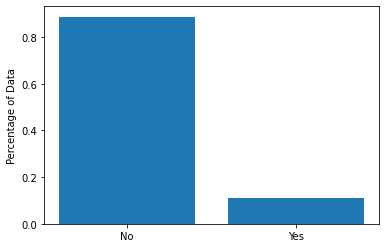

In [9]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_scaled, y_train = smote.fit_resample(X_train,y_train)

We choose SMOTE because it combines oversampling and undersampling. It generates new synthetic data points in the minority class, and it also increases the size of the minority class while avoiding overfitting.

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [12]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= 249.5\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'contact_telephone <= 0.5\ngini = 0.376\nsamples = 24074\nvalue = [18034, 6040]\nclass = No'),
 Text(0.125, 0.375, 'duration <= 134.5\ngini = 0.454\nsamples = 17018\nvalue = [11100, 5918]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.287\nsamples = 7782\nvalue = [6429, 1353]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 9236\nvalue = [4671, 4565]\nclass = No'),
 Text(0.375, 0.375, 'month_oct <= 0.5\ngini = 0.034\nsamples = 7056\nvalue = [6934, 122]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.027\nsamples = 6977\nvalue = [6881, 96]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.442\nsamples = 79\nvalue = [53, 26]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 0.5\ngini = 0.402\nsamples = 27086\nvalue = [7546, 19540]\nclass = Yes'),
 Text(0.625, 0.375, 'month_jul <= 0.5\ngini = 0.317\nsamples = 22916\nvalue = [4520, 18396]\nclass = Yes'),
 Tex

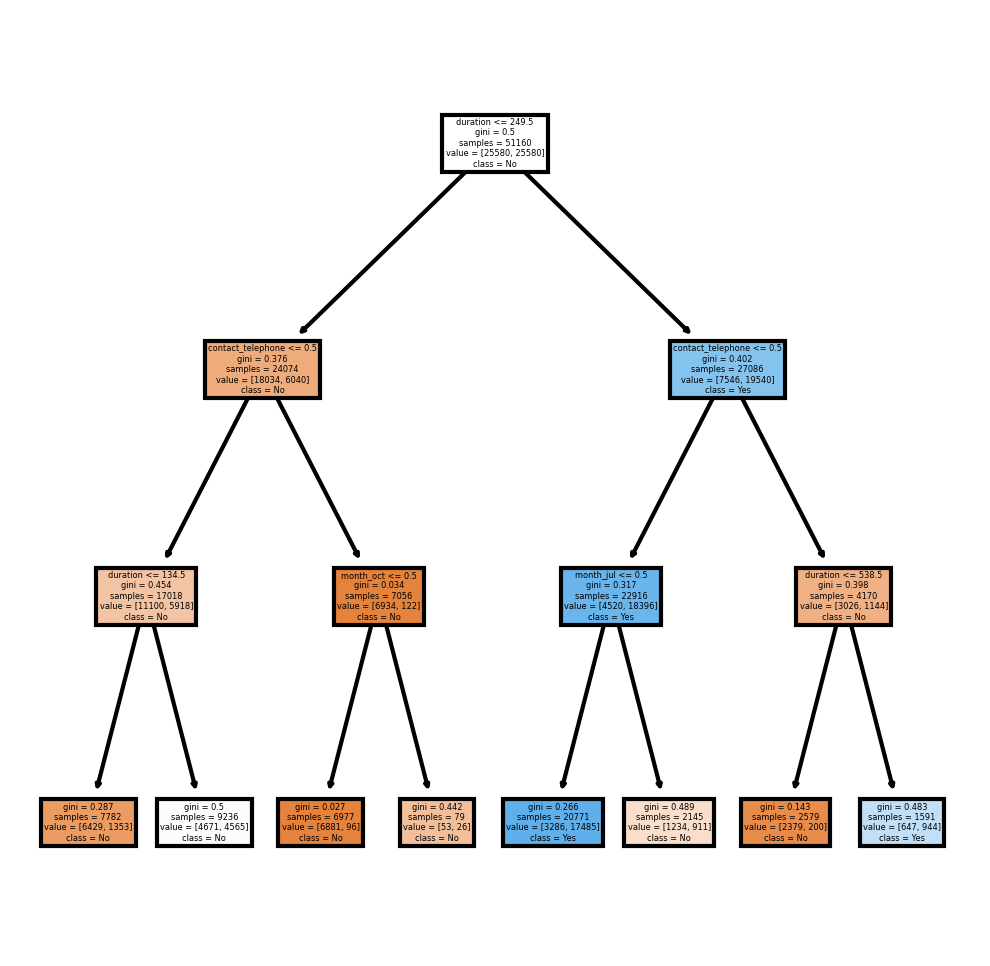

In [13]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])
               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [14]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

In [15]:
# calculate the accuracy
dtree_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", dtree_accuracy)

Accuracy: 0.8875940762320952


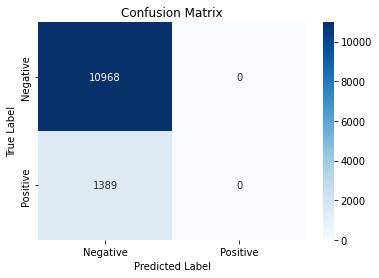

In [16]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [17]:
dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)

bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

bagged_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", bagged_accuracy)

Accuracy: 0.8875940762320952


In [18]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

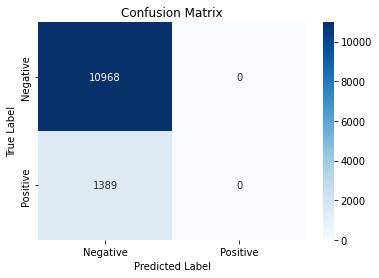

In [19]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)

In [22]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

In [23]:
# calculate the accuracy
boost_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", boost_accuracy)

Accuracy: 0.8876750020231448


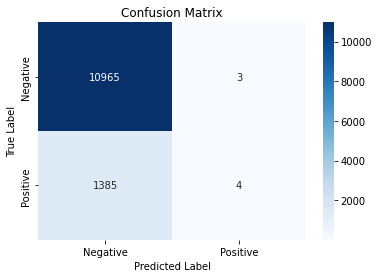

In [24]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [25]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 KB 6.0 MB/s eta 0:00:00


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
####IMPORT MORE BASE LEARNERS####
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [27]:
### SET YOUR BASE LEARNERS
super_learner = SuperLearner(folds=10, random_state=42)

base_estimators = [
    LogisticRegression(random_state=42),
    RandomForestClassifier(n_estimators=10, random_state=42),
    KNeighborsClassifier(n_neighbors=5),
    GradientBoostingClassifier(n_estimators=10, random_state=42),
    DecisionTreeClassifier(random_state=42)
]

super_learner.add(base_estimators)

### FIT TO TRAINING DATA
super_learner.fit(X_scaled, y_train)

### GET base_predictions
base_predictions = super_learner.predict(X_scaled)
base_predictions

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [28]:
### TRAIN YOUR METALEARNER
log_reg = LogisticRegression().fit(base_predictions, y_train)
y_pred = log_reg.predict(super_learner.predict(X_test))

In [29]:
### INTERPRET COEFFICIENTS
log_reg.coef_

array([[10.74840482,  0.30174375,  1.81614818,  1.00106924,  3.81580396]])

The coefficients indicate how the superlearner places weight on its predictions when making its own prediction. The coefficient represents the weights in the super learner model for Logistic Regression, Random Forest Classifier, K-Nearest Neighbors (KNN) Classification, Gradient Boosting Classifier, and Decision Tree Classifier are 10.74840482, 0.30174375, 1.81614818, 1.00106924, and 3.81580396 respectively. 

In [30]:
# calculate the accuracy
superlearner_accuracy = accuracy_score(y_test, y_pred)

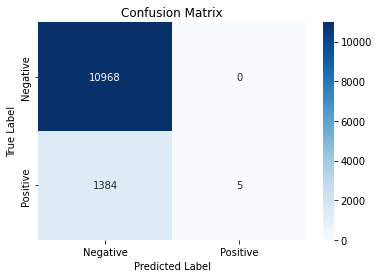

In [31]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
cm_super = confusion_matrix(y_true, y_pred)

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_super, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

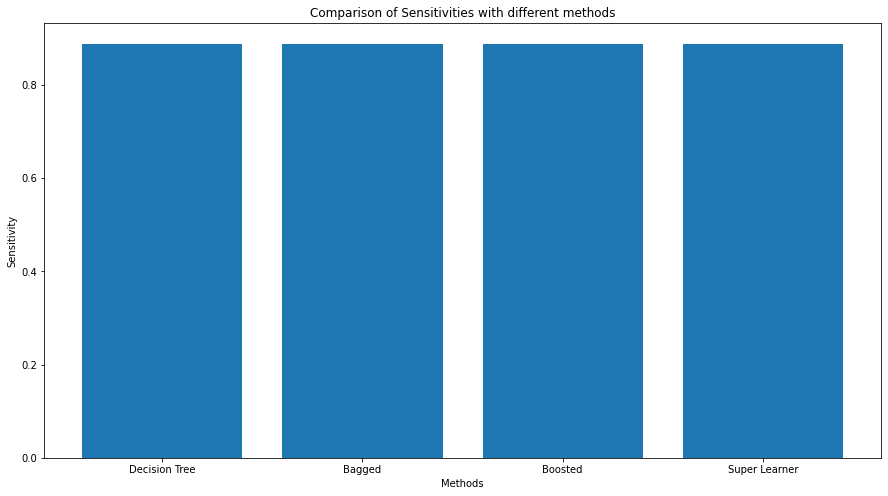

In [32]:
labels = ['Decision Tree', 'Bagged', 'Boosted', 'Super Learner']
accuracies = [dtree_accuracy, bagged_accuracy, boost_accuracy, superlearner_accuracy]

plt.figure(figsize=(15,8))
plt.bar(labels, accuracies)
plt.xlabel('Methods')
plt.ylabel('Sensitivity')
plt.title('Comparison of Sensitivities with different methods')
plt.show()

In [33]:
all_accuracy = pd.DataFrame(
    {'Decision Tree':[dtree_accuracy],
     'Bagged': [bagged_accuracy],
     'Boosted': [boost_accuracy],
     'Super Learner': [superlearner_accuracy]
    }
)
all_accuracy

,Decision Tree,Bagged,Boosted,Super Learner
0,0.887594,0.887594,0.887675,0.887999
